In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.0'

In [3]:
#from keras.datasets import mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'D:\\Users\\bsosn\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
import matplotlib.pyplot as plt

In [9]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

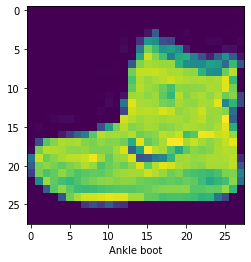

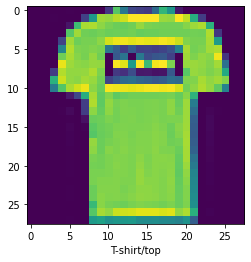

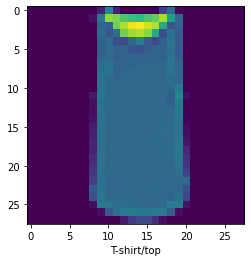

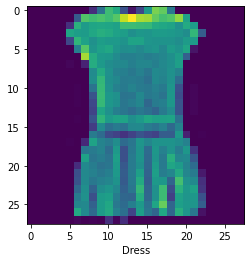

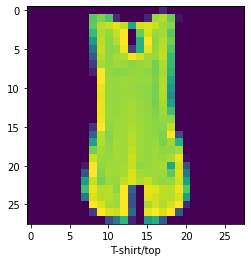

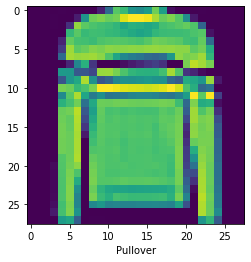

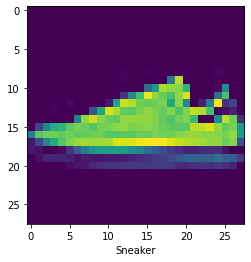

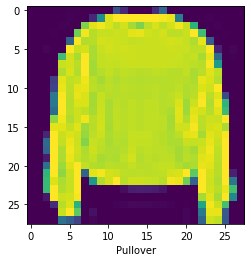

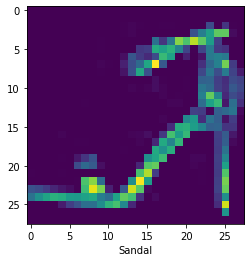

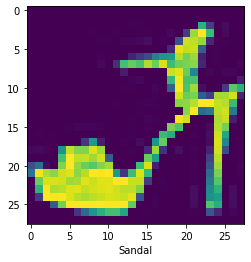

In [10]:
for i in range(10):
    plt.figure()
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i]])
plt.show()

In [11]:
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
from keras.utils import to_categorical

x_train = x_train.reshape((60000, 28, 28, 1 ))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1 ))
x_test = x_test.astype('float32') / 255


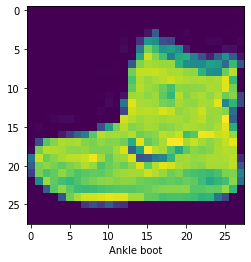

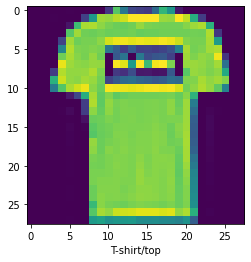

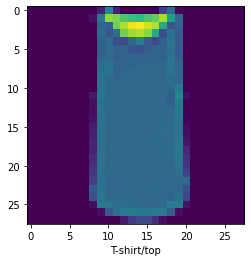

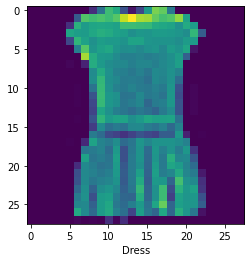

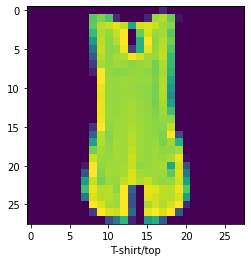

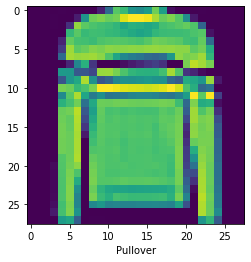

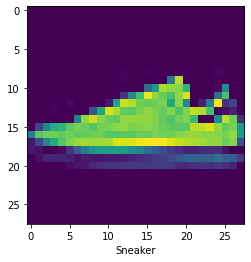

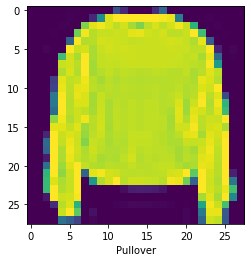

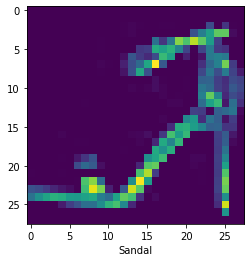

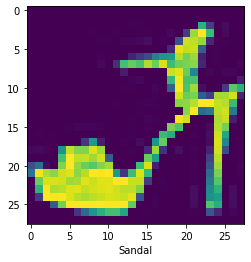

In [13]:
for i in range(10):
    plt.figure()
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i]])
plt.show()

In [14]:
from keras.layers import Conv2D,Flatten,Softmax,Dropout,BatchNormalization,MaxPooling2D,Dense 


#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [15]:
model = tf.keras.Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1),padding='same'),
    #tf.keras.layers.Dropout(0.20),
    MaxPooling2D((2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [17]:
model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.keras.losses.sparse_categorical_crossentropy)

In [18]:
model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4478 - accuracy: 0.8381 - val_loss: 0.3583 - val_accuracy: 0.8748
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2958 - accuracy: 0.8928 - val_loss: 0.2921 - val_accuracy: 0.8974
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2545 - accuracy: 0.9056 - val_loss: 0.2693 - val_accuracy: 0.8996
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2253 - accuracy: 0.9166 - val_loss: 0.2628 - val_accuracy: 0.9061
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2009 - accuracy: 0.9268 - val_loss: 0.2488 - val_accuracy: 0.9097
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1812 - accuracy: 0.9320 - val_loss: 0.2460 - val_accuracy: 0.9113
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1650 - accuracy: 0.9387 - val_loss: 0.2367 -

In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2577 - accuracy: 0.9147


In [20]:
print('\nTest accuracy:', test_accuracy)


Test accuracy: 0.9146999716758728


In [21]:
#pip install --upgrade pip

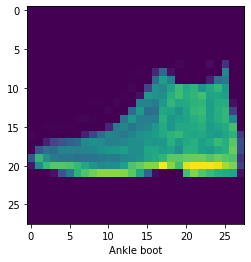

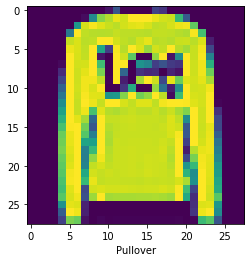

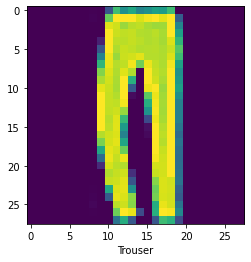

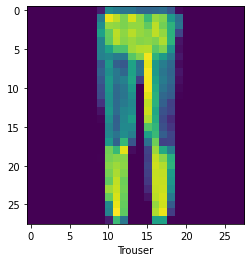

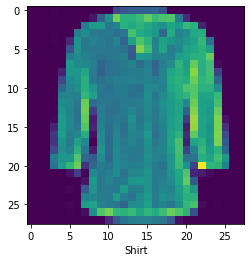

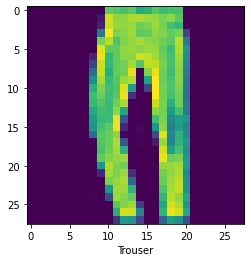

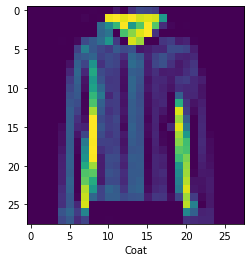

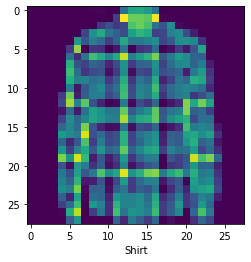

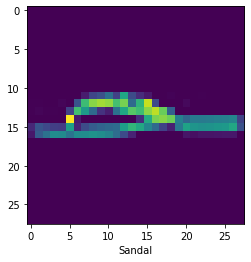

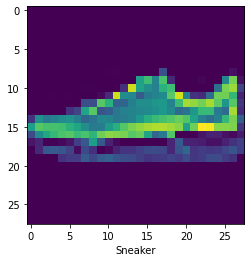

In [22]:
for i in range(10):
    plt.figure()
    plt.imshow(x_test[i])
    plt.xlabel(classes[y_test[i]])
plt.show()

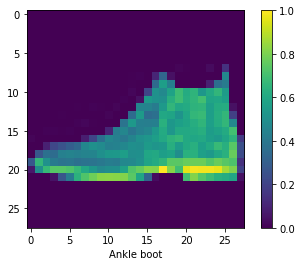

(1, 28, 28, 1)
1/1 [==============================] - 0s 91ms/step


In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(classes[y_test[0]])
plt.show()

img = x_test[0]
img = img.reshape(1,28,28,1)
print(img.shape)
activations = model.predict(img)

In [24]:
selectedLayers = [0,1,2,3]
import keras
selectedOutputs = [model.layers[i].output for i in selectedLayers]
lossModel = keras.Model(model.inputs,selectedOutputs)

lossModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable par

In [25]:
activations = lossModel.predict(img)
layer_one = activations[0]
print(layer_one.shape)

1/1 [==============================] - 0s 48ms/step
(1, 28, 28, 32)


In [26]:
layer_two = activations[1]
print(layer_two.shape)

(1, 14, 14, 32)


<Figure size 432x288 with 0 Axes>

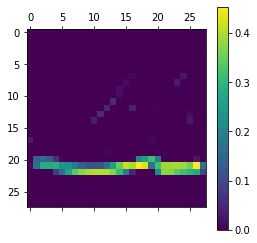

In [27]:
plt.figure()
plt.matshow(layer_one[0,:,:,4],cmap='viridis')
plt.colorbar()
plt.grid(False)

<Figure size 432x288 with 0 Axes>

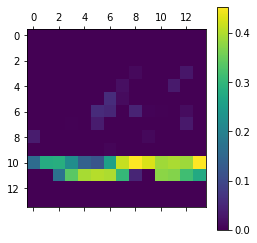

In [28]:
plt.figure()
plt.matshow(layer_two[0,:,:,4],cmap='viridis')
plt.colorbar()
plt.grid(False)

(1, 14, 14, 32)


<Figure size 432x288 with 0 Axes>

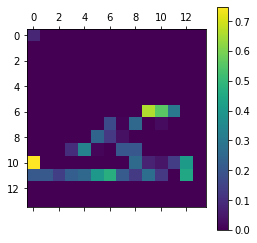

In [29]:
layer_three = activations[2]
print(layer_three.shape)
plt.figure()
plt.matshow(layer_three[0,:,:,4],cmap='viridis')
plt.colorbar()
plt.grid(False)

(1, 7, 7, 32)


<Figure size 432x288 with 0 Axes>

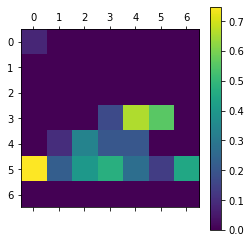

In [30]:
layer_four = activations[3]
print(layer_four.shape)
plt.figure()
plt.matshow(layer_four[0,:,:,4],cmap='viridis')
plt.colorbar()
plt.grid(False)

In [31]:
predictImage=model.predict(img) 
class_index=np.argmax(predictImage,axis=1)

1/1 [==============================] - 0s 16ms/step


[9]


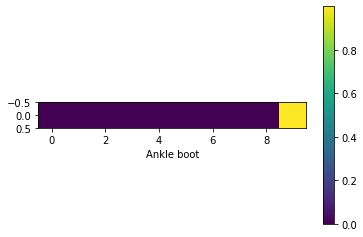

In [32]:
print(class_index)
plt.figure()
plt.imshow(predictImage)
plt.colorbar()
plt.grid(False)
plt.xlabel(classes[class_index[0]])
plt.show()

In [52]:
def plot_charts(i, predictions):
    pred_label = np.argmax(predictions[i])
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,2)
    plt.imshow(x_test[i])
    plt.xlabel("{} {:2.0f}% ({})".format(classes[pred_label],100*np.max(predictions),classes[y_test[i]]),color="black")
    plt.colorbar()
    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="#262626")
    plt.ylim([0, 1])
    thisplot[pred_label].set_color('red')
    thisplot[y_test[i]].set_color('green')
    plt.show()

In [53]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 4ms/step


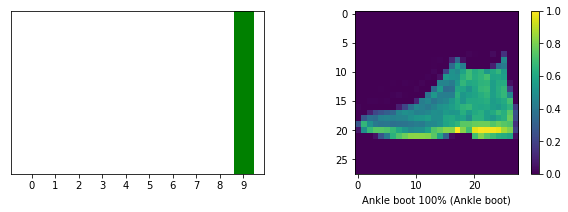

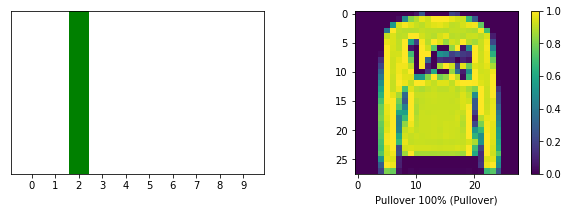

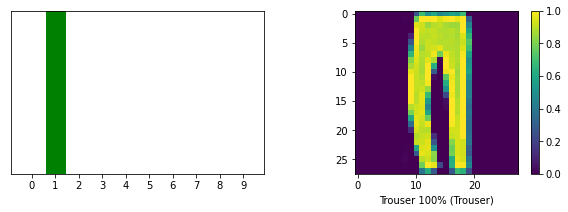

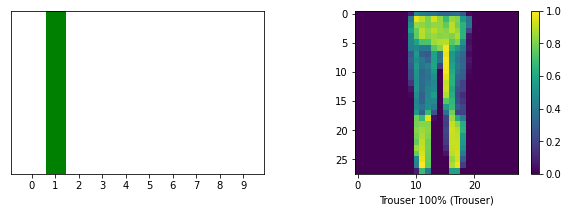

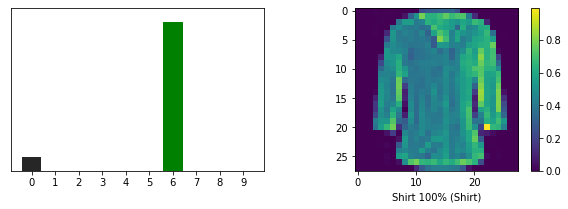

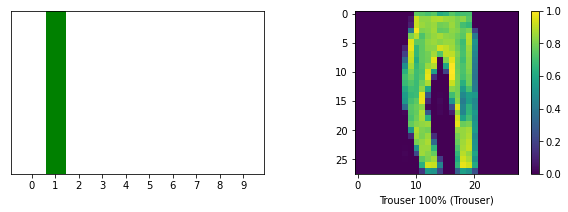

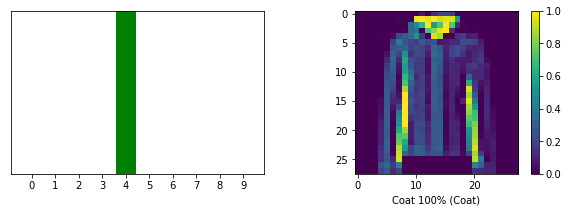

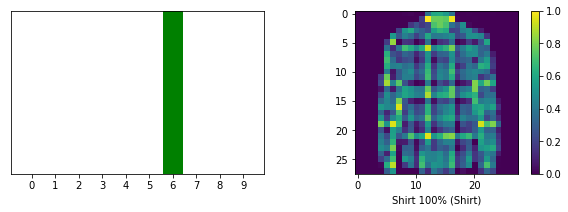

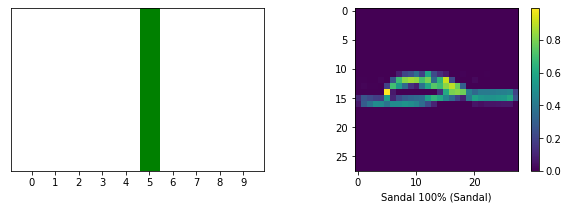

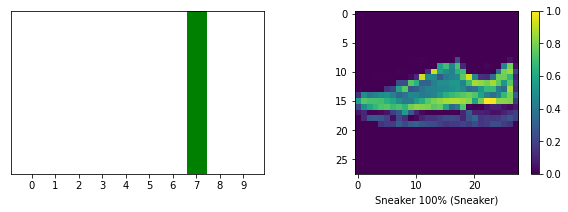

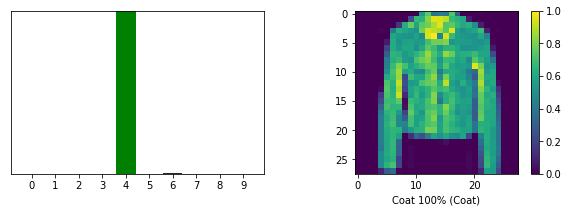

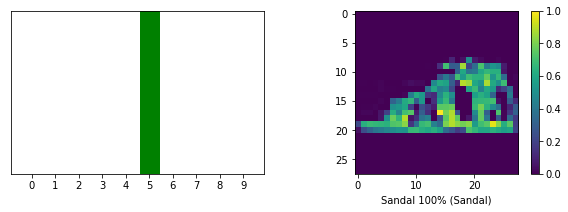

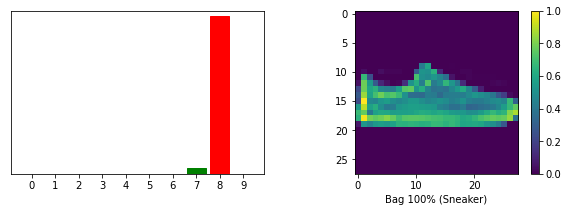

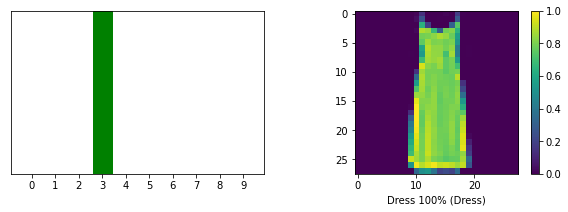

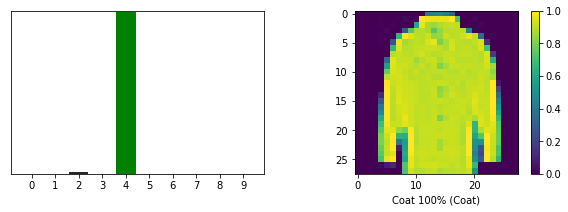

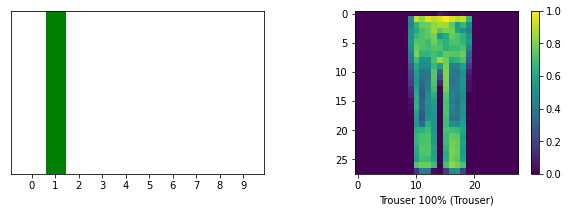

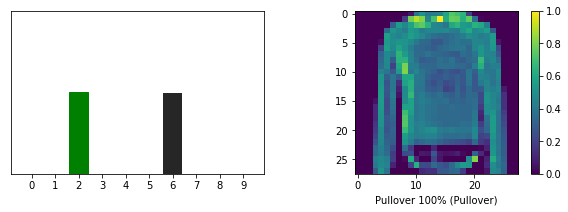

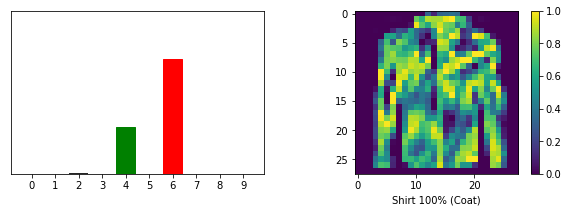

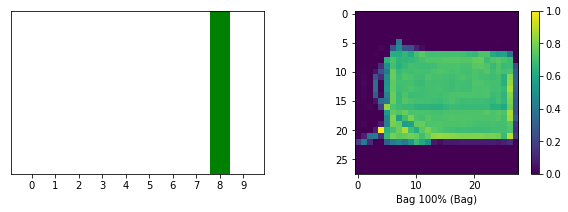

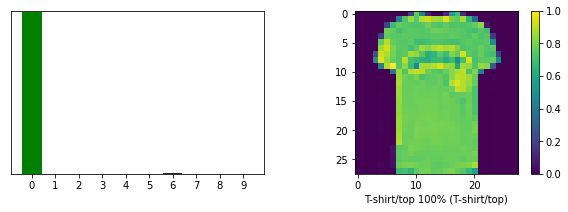

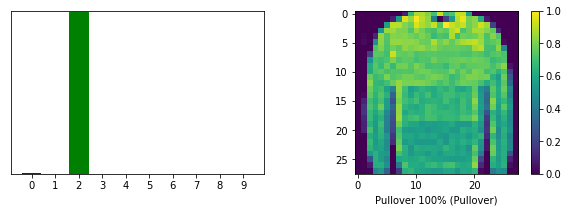

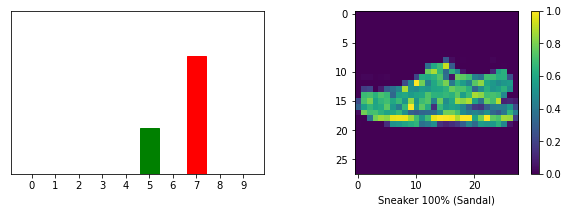

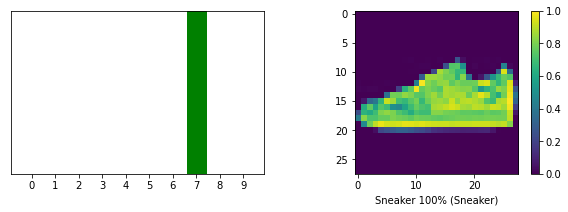

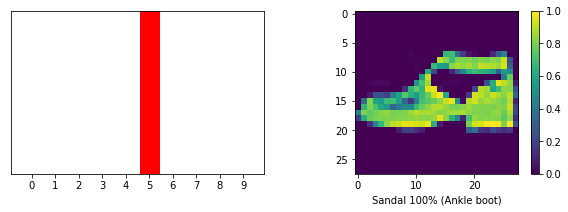

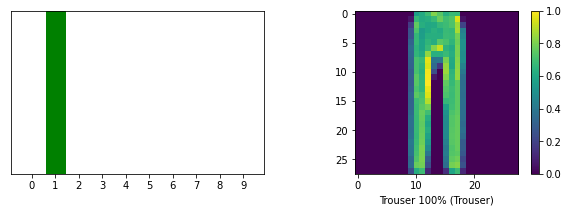

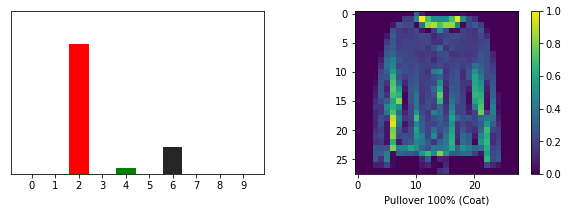

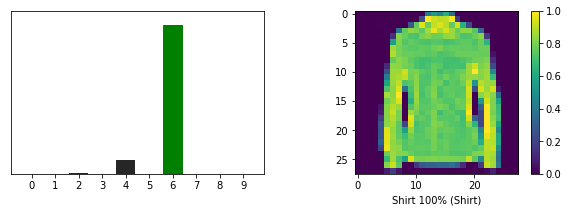

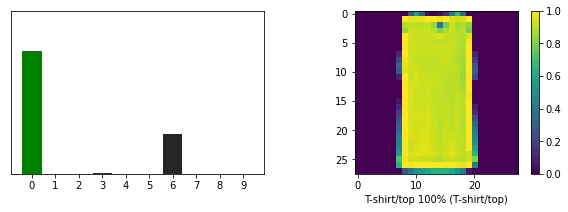

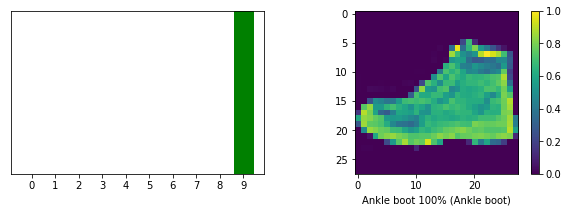

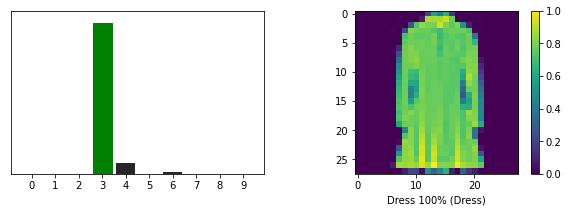

In [54]:
for i in range(30):
    plot_charts(i, predictions)

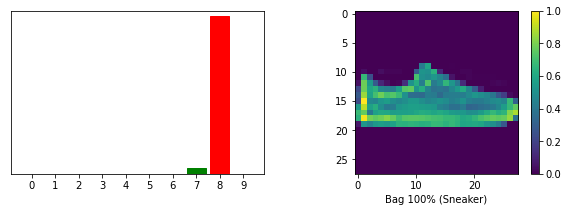

In [55]:
plot_charts(12, predictions)